# 라이브러리 및 데이터 로딩

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [87]:
# 데이터 로딩
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 2000
다음 그림은 숫자 6 입니다.


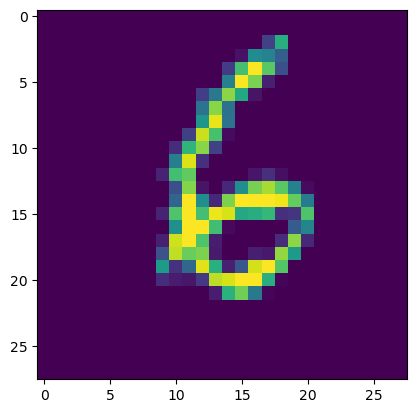

In [88]:
# 이미지 확인해보기
id = rd.randrange(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
plt.imshow(test_x[id])
plt.show()

# Convolutional Layer를 사용하기위한 reshape

In [89]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [90]:
_, h, w = train_x.shape

print(h, w)

28 28


In [91]:
train_x = train_x.reshape(train_x.shape[0], h, w, 1)
test_x = test_x.reshape(test_x.shape[0], h, w, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


### 이미지가 0 ~ 1 사이 값을 갖도록 스케일 조정!

In [92]:
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 255 , min : 0


In [93]:
max_num = train_x.max()
min_num = train_x.min()

train_x = (train_x - min_num)/(max_num - min_num)
test_x = (test_x - min_num)/(max_num - min_num)

In [94]:
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 1.0 , min : 0.0


### 원핫인코딩

In [63]:
from tensorflow.keras.utils import to_categorical

In [64]:
class_n = len(np.unique(train_y))

train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [66]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

# 모델링

In [95]:
# 라이브러리 불러오기
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping

In [75]:
# 아래와 같은 코드

# # 1번. 세션 클리어
# keras.backend.clear_session()

# # 2번. 레이어 엮기
# il = Input(shape=(28,28,1))
# hl = Conv2D(filters=64,              # Conv2D를 통해 제작하려는 Feature map의 수
#               kernel_size=(3,3),     # filter size
#               strides=(1,1),         # filter가 얼마나 촘촘히 훑을 것인가 (sliding window)
#               padding='same',        # filter가 훑기 전에 상하좌우로 픽셀을 덧붙임
#               activation='relu')(il) # activation 주의!!!
# hl = Conv2D(filters=64,              # Conv2D를 통해 제작하려는 Feature map의 수
#               kernel_size=(3,3),     # filter size
#               strides=(1,1),         # filter가 얼마나 촘촘히 훑을 것인가 (sliding window)
#               padding='same',        # filter가 훑기 전에 상하좌우로 픽셀을 덧붙임
#               activation='relu')(il) # activation 주의!!!
# hl = MaxPool2D(pool_size=(2,2),      # pooling filter의 가로 세로 크기
#               strides=(2,2)          # pooling filter의 이동 보폭
#               )(hl)
# hl = Flatten()(hl)

# ol = Dense(10, activation='softmax')(hl)

# # 3. 모델의 시작과 끝 지정
# model = Model(il, ol)

# model.compile(optimizer='adam',
#               loss=keras.losses.categorical_crossentropy, 
#               metrics='accuracy')
# model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                125450    
                                                                 
Total params: 126090 (492.54 KB)
Trainable params: 126090 (492.54 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [96]:
# 위 코드와 동일
## Sequential API
# 1번. 세션 클리어
keras.backend.clear_session()

# 2번. 모델 발판 생성
model = keras.models.Sequential()

# 3번. 레이어 조립
model.add( Input(shape=(28,28,1)) )

model.add( Conv2D(filters=64,              # Conv2D를 통해 제작하려는 Feature map의 수
                  kernel_size=(3,3),       # filter size
                  strides=(1,1),           # filter가 얼마나 촘촘히 훑을 것인가 (sliding window)
                  padding='same',          # filter가 훑기 전에 상하좌우로 픽셀을 덧붙임
                  activation='relu') )     # activation 주의!!!

model.add( MaxPool2D(pool_size=(2,2)) )    # pooling filter 사이즈

model.add( Flatten() )
model.add( Dense(10, activation='softmax') )

# 4번. 컴파일 (원핫인코딩 안할경우 : sparse_categorical_crossentropy)
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                125450    
                                                                 
Total params: 126090 (492.54 KB)
Trainable params: 126090 (492.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Earlystopping 설정

In [97]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

### 데이터 학습하기

In [98]:
# 데이터를 넣어서 학습시키자!
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=5, verbose=1,
                 callbacks=[es])

Epoch 1/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2119 - accuracy: 0.9378 - val_loss: 0.0865 - val_accuracy: 0.9748
Epoch 2/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0753 - accuracy: 0.9771 - val_loss: 0.0777 - val_accuracy: 0.9774
Epoch 3/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0576 - accuracy: 0.9830 - val_loss: 0.0703 - val_accuracy: 0.9791
Epoch 4/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0659 - val_accuracy: 0.9812
Epoch 5/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0693 - val_accuracy: 0.9797


In [99]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print(f'Test Loss : {performance_test[0]:.6f} |  Test Accuracy : {performance_test[1]*100:.2f}%')

100/100 [==============================] - 2s 13ms/step - loss: 0.0573 - accuracy: 0.9816
Test Loss : 0.057309 |  Test Accuracy : 98.16%


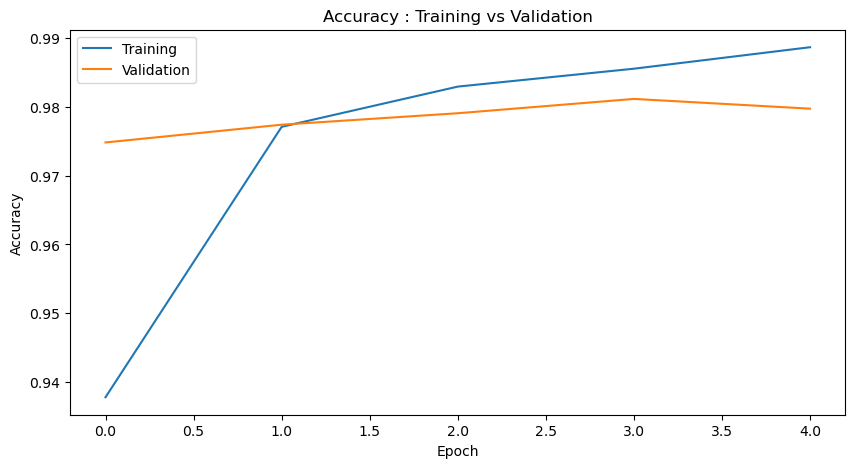

In [100]:
if not isinstance(hist, dict):
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

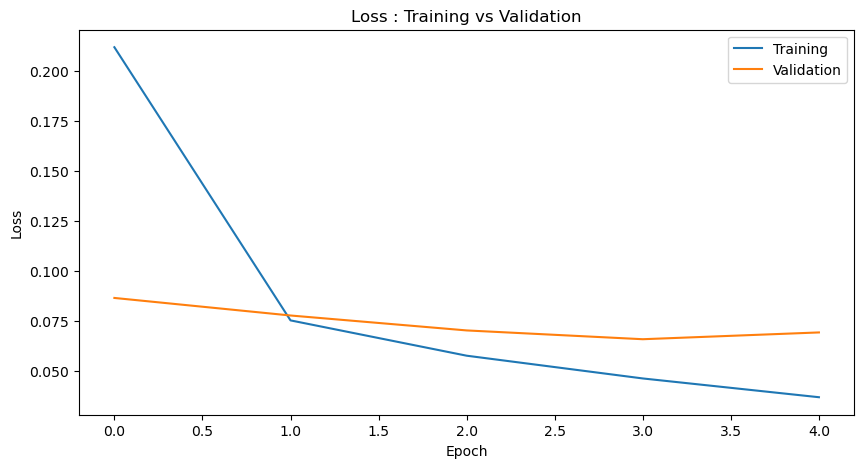

In [101]:
if not isinstance(hist, dict):
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

### 데이터 예측하기

In [102]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%' )
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%' )

313/313 [==============================] - 2s 7ms/step
CNN
트레이닝 정확도 : 98.86%
테스트 정확도 : 98.16%


## 숫자 이미지 시각화

id = 3829
다음 그림은 숫자 8 입니다.
모델의 예측 : 8
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0.  0.  0. 99.  0.]
정답입니다


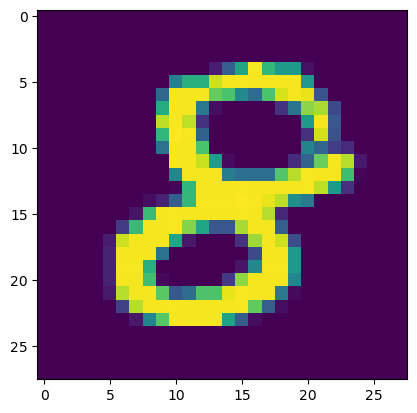

In [103]:
id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y[id] == single_pred_test[id]:
    print('정답입니다')
else:
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

### 틀린 값만 확인해보기

id = 2921
다음 그림은 숫자 3 입니다.
모델의 예측 : 2
모델의 카테고리별 확률 : [ 3.  0. 57. 11.  0.  0.  0.  0. 27.  0.]
틀렸어요


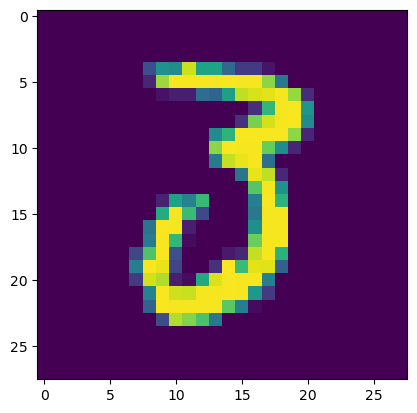

In [104]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y==single_pred_test)
f_id = np.where(true_false==False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y[id] == single_pred_test[id]:
    print('정답입니다')
else:
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]))
plt.show()